# Exercise 6

# Cramér Rao Bound

1) Show that the formulations for Fisher Information $$I(θ) = E_x[(∂_θ log p)^2]$$ and $$I(θ) = −E_x[∂_θ^2 log p]$$
are equivalent

2) Derive an expression for the Fisher Information for n identically random variables i.i.d from $p(x|θ)$. What can you say about how the information behaves as you add samples?

In this exercise we will illustrate the property of the MLE estimate of saturatig the Cramér Rao bound by constructig a set of estimators (incl. the MLE one) and comparing it to the bound

We start with a standard set of imports.

In [154]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np

We'll consider the Poisson model, which `scipy` provides as `sps.poisson(rate)`. One draw  of 100 numbers represents single experimet.

Given a fixed rate, simultate 100k experiment.

In [155]:
rate = 47.6
samples = sps.poisson(rate).rvs(size  = (100000,100))

Build a few estimators based on the sample mean of the first 10,30,.., and all 100 nunmbers. Then plot the distribution for each, across 100k experiments.

Text(0, 0.5, '$p(n|\\lambda)$')

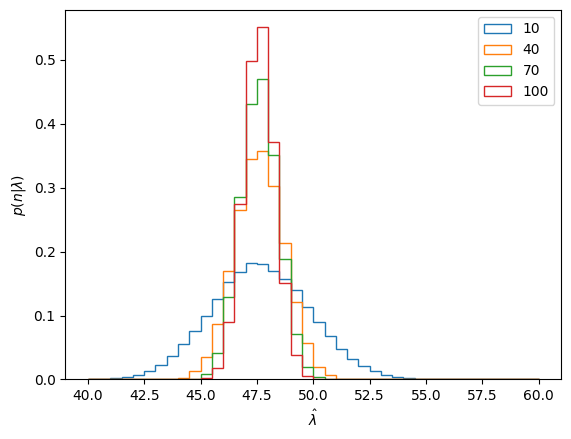

In [156]:
est_size  =  np.array([10,40,70,100])
estimators = [samples[:,:ns].mean(axis=-1) for ns in est_size]

for e,size in zip(estimators,est_size):
    plt.hist(e, bins = np.linspace(40,60,41), density='True', histtype = 'step', label = size)
plt.legend()
plt.xlabel(r'$\hat{\lambda}$')
plt.ylabel(r'$p(n|\lambda)$')

What can you say about the bias and variance of the estimators?

A: We see that all estimator distributions are centered around the true rate of 47.5, i.e. they are unbiased. But we see a difference between the estimators. The ones that use more or the available data have smaller variance than the ones using less data!

plot the bias and variance of each estimator. 

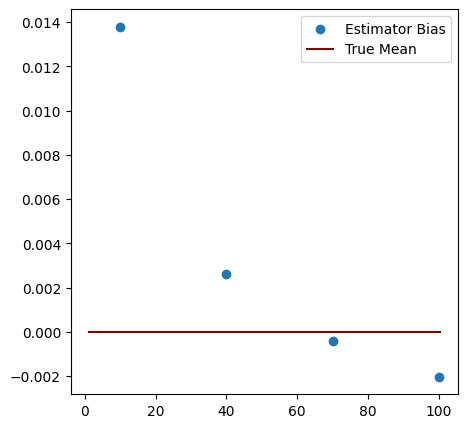

In [157]:
means = np.array([e.mean() for e in estimators])
variances = np.array([e.var() for e in estimators])

plt.scatter(est_size,means - rate, label = 'Estimator Bias')
plt.hlines(0,1,est_size.max()+0.5, colors = 'maroon', label = 'True Mean')
plt.legend()
plt.gcf().set_size_inches(5,5)

The Cramér-Rao bound says that the mininmum variance is given by the inverse of Fisher information:

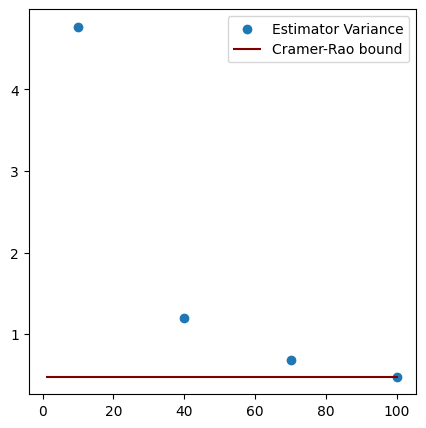

In [158]:
information = 100*1/rate
cramer_rao_bound = 1/information
plt.scatter(est_size,variances, label = 'Estimator Variance')
plt.hlines(cramer_rao_bound,1,est_size.max()+0.5, colors = 'maroon', label = 'Cramer-Rao bound')
plt.legend()
plt.gcf().set_size_inches(5,5)

Does the Cramér-Rao inequality hold?


A: We see here that the full use of the data (which corresponds to the MLE estimate) achieves but does not exceed the bound

# Bias-Variance Tradeoff

1) Consider the exponential distribution $$ p(x|\lambda) = \frac{1}{\lambda}\exp(-x/\lambda) $$ Derive an expression for the MLE estimator $\hat{\lambda}$ given n observations

2) For n = 1, compute the bias, variance and mean squared error ("MSE") of two estimators: 1) the constant estimator $\hat{\lambda}$ = 0 and 2) the MLE estimator. Does the variance of the constant estimator disprove the Cramér-Rao inequality?

Let's consider an experiment with $n=1$ observations of random numbers originating from this model. We can simulate 100,000 such experiments:

In [159]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

def model(scale):
    return sps.expon(scale = scale)

true_value = 10.0
n_variables = 1
toys = model(true_value).rvs(size = (100000,n_variables))

The MLE estimator is the sample mean

$$ \hat{\lambda}_\mathrm{MLE} = \frac{1}{N}\sum_{i=1}^{N} x_i $$

Using the definitions of bias, variance and mean squared error ("MSE") we can study those metrics
for the estimator 

$$ \hat{\lambda} = (1-m) \hat{\lambda}_\mathrm{MLE} $$

In [160]:
def analyze(m):
    estim = (1-m)*(toys.mean(axis=1))
    mean_estim = estim.mean()
    delta = estim-true_value
    bias = mean_estim - true_value
    variance = ((estim-mean_estim)**2).mean()
    mse = (delta**2).mean()
    return ({
        'bias': bias,
        'var': variance,
        'mse': mse,
        'mean_est': mean_estim
    }, estim)

Scan the parameter from $m=0$ (the MLE) to $m=1$ (the constant estimator) and plot $\mathrm{bias}^2$, $\mathrm{var}$, $\mathrm{bias}^2 + \mathrm{var}$ and MS. Which value of m achieves the lowest possible MSE? Discuss the result qualitatively in terms of bias and variance

In [161]:
fscan = np.linspace(0,1.0)
analyzed = np.array([[analyze(f)[0][x] for x in ['bias','var','mse']] for f in fscan])

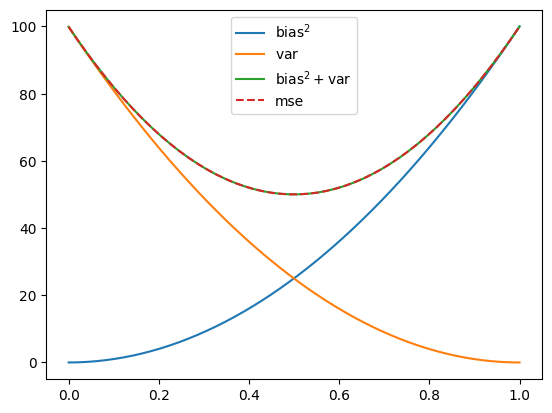

In [162]:
plt.plot(fscan,analyzed[:,0]**2, label = r'$\mathrm{bias}^2$')
plt.plot(fscan,analyzed[:,1], label = r'$\mathrm{var}$')
plt.plot(fscan,analyzed[:,0]**2 + analyzed[:,1], label = r'$\mathrm{bias}^2 + \mathrm{var}$')
plt.plot(fscan,analyzed[:,2], label = 'mse', linestyle = r'dashed')
plt.legend()

bonus: try with `n_variables` > 1

# Optimization algs

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Generate data from a mixture (weight1 + weight2 = 1) of two normal distributions with know means and vars and plot the distribution

In [164]:
means = [5, 10]
variances = [3, 2]
weights = [0.6, 0.4]
sample_size = 1000

In [165]:
data = np.concatenate([
    np.random.normal(means[0], np.sqrt(variances[0]), int(weights[0] * sample_size)),
    np.random.normal(means[1], np.sqrt(variances[1]), int(weights[1] * sample_size))
])

wirte the log-likelihood function for a mixture of two normal distributions

In [166]:
def log_likelihood(params, data):
    mean1, mean2, variance1, variance2, weight1 = params
    pdf1 = norm.pdf(data, mean1, np.sqrt(variance1))
    pdf2 = norm.pdf(data, mean2, np.sqrt(variance2))
    likelihood = weight1 * pdf1 + (1 - weight1) * pdf2
    return -np.sum(np.log(likelihood))

Find the MLE using Optimization Algorithms from e.g. `scipy.optimize`

In [167]:
from scipy.optimize import minimize

You can try different algs (with and without grads) and plot the results. For example method=`'Nelder-Mead'`,`'Powell'`,`'L-BFGS-B'`

`tip`: be carefull about parameters initial values and bounds 

In [168]:
true_params = means + variances + weights[0:1]

# Initial guess for the optimization
initial_guess = [4, 9, 1, 5, 0.8]
bounds=[(None, None), (None, None), (0.1, None), (0.1, None), (0, 1)]

result_nelder_mead = minimize(log_likelihood, initial_guess, args=(data,), method='Nelder-Mead', bounds=bounds)
result_powell = minimize(log_likelihood, initial_guess, args=(data,), method='Powell' , bounds=bounds)
result_lbfgsb = minimize(log_likelihood, initial_guess, args=(data,), method='L-BFGS-B', bounds=bounds)

print(f'True Parameters: {true_params}')
print(f'Nelder-Mead MLE: {result_nelder_mead.x}')
print(f'Powell MLE: {result_powell.x}')
print(f'L-BFGS-B MLE: {result_lbfgsb.x}')

True Parameters: [5, 10, 3, 2, 0.6]
Nelder-Mead MLE: [4.95634881 9.79117979 2.71210737 2.35441506 0.57173723]
Powell MLE: [4.98637179 9.82969807 2.72112652 2.30305073 0.57722419]
L-BFGS-B MLE: [4.95634269 9.79117728 2.71213024 2.35440419 0.57173883]


In [169]:
x = np.linspace(np.min(data), np.max(data), 100)
mixture_pdf_true = weights[0] * norm.pdf(x, means[0], np.sqrt(variances[0])) + \
                    weights[1] * norm.pdf(x, means[1], np.sqrt(variances[1]))
mixture_pdf_nelder_mead = result_nelder_mead.x[4] * norm.pdf(x, result_nelder_mead.x[0], np.sqrt(result_nelder_mead.x[2])) + \
                        (1 - result_nelder_mead.x[4]) * norm.pdf(x, result_nelder_mead.x[1], np.sqrt(result_nelder_mead.x[3]))
mixture_pdf_powell = result_powell.x[4] * norm.pdf(x, result_powell.x[0], np.sqrt(result_powell.x[2])) + \
                        (1 - result_powell.x[4]) * norm.pdf(x, result_powell.x[1], np.sqrt(result_powell.x[3]))
mixture_pdf_lbfgsb = result_lbfgsb.x[4] * norm.pdf(x, result_lbfgsb.x[0], np.sqrt(result_lbfgsb.x[2])) + \
                        (1 - result_lbfgsb.x[4]) * norm.pdf(x, result_lbfgsb.x[1], np.sqrt(result_lbfgsb.x[3]))

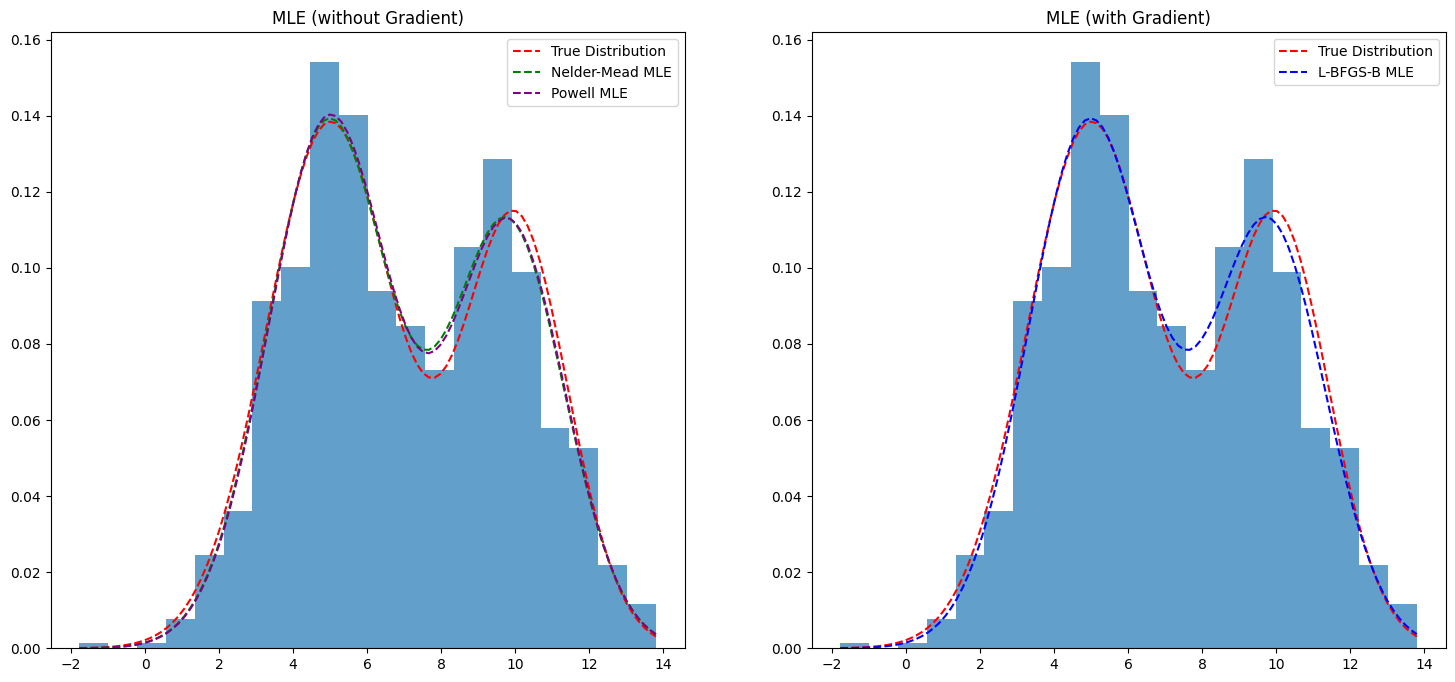

In [170]:
x = np.linspace(np.min(data), np.max(data), 100)
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.title('MLE (without Gradient)')
plt.hist(data, bins=20, density=True, alpha=0.7)
plt.plot(x, mixture_pdf_true, 'r--', label='True Distribution')
plt.plot(x, mixture_pdf_nelder_mead, 'g--', label='Nelder-Mead MLE')
plt.plot(x, mixture_pdf_powell, 'purple', linestyle='--', label='Powell MLE')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('MLE (with Gradient)')
plt.hist(data, bins=20, density=True, alpha=0.7)
plt.plot(x, mixture_pdf_true, 'r--', label='True Distribution')
plt.plot(x, mixture_pdf_lbfgsb, 'b--', label='L-BFGS-B MLE')
plt.legend()

plt.show()
